"""
Malmquist Bias Example
----------------------
Figure 5.2

An illustration of the bias in a subsample selected using measurements with
finite errors, when the population distribution is a steep function. The
sample is drawn from the distribution :math:`p(x) \propto 10^{0.6x}`, shown
by the solid line in the left panel, and convolved with heteroscedastic errors
with widths in the range :math:`0.5 < \sigma < 1.5`. When a subsample is
selected using "measured" values, as illustrated in the left panel, the
distribution of differences between the "observed" and true values is biased,
as shown by the histogram in the right panel. The distribution is biased
because more objects with larger true x are scattered into the subsample
from the right side, than from the left side where the true x are smaller.
"""

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats.random import trunc_exp

In [2]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

# Sample from a truncated exponential distribution

In [3]:
#------------------------------------------------------------
# Sample from a truncated exponential distribution
N = int(1E6)
hmin = 4.3
hmax = 5.7
k = 0.6 * np.log(10)
true_dist = trunc_exp(hmin - 1.4,
                      hmax + 3.4,
                      0.6 * np.log(10))

# draw the true distributions and heteroscedastic noise
np.random.seed(0)
h_true = true_dist.rvs(N)
dh = 0.5 * (1 + np.random.random(N))
h_obs = np.random.normal(h_true, dh)

# create observational cuts
cut = (h_obs < hmax) & (h_obs > hmin)

# select a random (not observationally cut) subsample
rand = np.arange(len(h_obs))
np.random.shuffle(rand)
rand = rand[:cut.sum()]


Text(0.5, 0, 'h\\_obs')

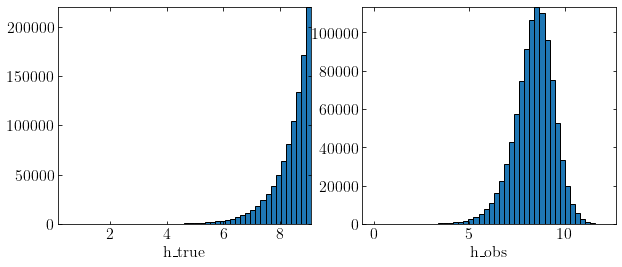

In [4]:
fig = plt.figure(figsize=(10, 4))
ax=fig.add_subplot(121)
ax.hist(h_true,bins=50);
ax.set_xlabel("h\_true")
ax=fig.add_subplot(122)
ax.hist(h_obs,bins=50);
ax.set_xlabel("h\_obs")

# plot the results

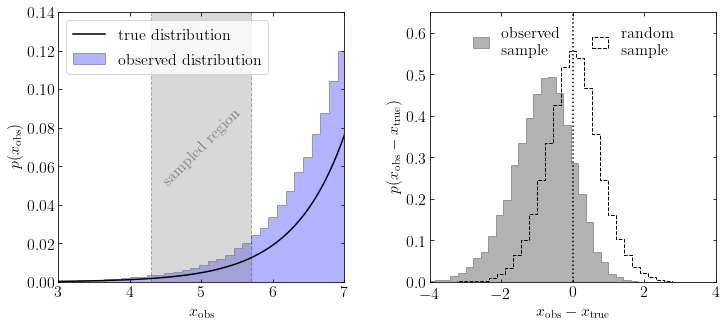

In [5]:
#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(11, 5))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

# First axes: plot the true and observed distribution
ax = fig.add_subplot(121)
bins = np.linspace(0, 12, 100)

x_pdf = np.linspace(0, 12, 1000)
ax.plot(x_pdf, true_dist.pdf(x_pdf), '-k',label='true distribution')
ax.hist(h_obs, bins, histtype='stepfilled',alpha=0.3, fc='b', density=True,label='observed distribution')
ax.legend(loc=2, handlelength=2)

ax.add_patch(plt.Rectangle((hmin, 0), hmax - hmin, 1.2,
                           fc='gray', ec='k', linestyle='dashed',
                           alpha=0.3))
ax.text(5, 0.07, 'sampled region', rotation=45, ha='center', va='center',
        color='gray')

ax.set_xlim(hmin - 1.3, hmax + 1.3)
ax.set_ylim(0, 0.14001)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlabel(r'$x_{\rm obs}$')
ax.set_ylabel(r'$p(x_{\rm obs})$')

# Second axes: plot the histogram of (x_obs - x_true)
ax = fig.add_subplot(122)
bins = 30
ax.hist(h_obs[cut] - h_true[cut], bins, histtype='stepfilled',alpha=0.3, color='k', density=True, label='observed\nsample')
ax.hist(h_obs[rand] - h_true[rand], bins, histtype='step',color='k', linestyle='dashed', density=True, label='random\nsample')
ax.plot([0, 0], [0, 1], ':k')
ax.legend(ncol=2, loc='upper center', frameon=False, handlelength=1)

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.65)
ax.set_xlabel(r'$x_{\rm obs} - x_{\rm true}$')
ax.set_ylabel(r'$p(x_{\rm obs} - x_{\rm true})$')
plt.show()
